# <center> E-commerce Customer Segmentation

- Abstract:

A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the e- commerce site. This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on.

- Problem Statement:
    
Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest.

- Dataset Information:

The data was collected from a well known e-commerce website over a period of time based on the customer’s search profile.

- Variable Description:

|   Column   |     Description     |
|------------|---------------------|
|  Cust_ID   | Unique numbering for customers |
|   Gender   |   Gender of the customer |
|   Orders   | Number of orders placed by each customer in the past |

Remaining 35 features (brands) contains the number of times customers have searched them

- Scope:

● Analyzing the existing customer data and getting valuable insights about the purchase pattern
● Data pre-processing including missing value treatment
● Segmenting customer based on the optimum number of clusters (‘k’) with the help of silhouette score

### Getting Data

In [171]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')   # for clean notebook

In [172]:
# Importing data using read_csv 
df = pd.read_excel('cust_data.xlsx')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [173]:
# Creating copy of dataset
data = df.copy(deep=True)

In [174]:
# Last 5 rows of dataframe
df.tail()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999,30000,F,3,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
# Dimensionality of dataframe 
df.shape

(30000, 38)

In [176]:
# Elements in dataframe
df.size

1140000

In this E commerce data we have total 37 features and 30000 rows.

In [177]:
# Columns in dataframe
print(df.columns)

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')


In [178]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

- Except gender all columns are numerical in nature. 

In [179]:
# Checking unique values of columns
for i in df.columns:
    print('Unique values in',i, 'are:\n',df[i].unique())
    print('------------------------------------------------------')

Unique values in Cust_ID are:
 [    1     2     3 ... 29998 29999 30000]
------------------------------------------------------
Unique values in Gender are:
 ['M' 'F' nan]
------------------------------------------------------
Unique values in Orders are:
 [ 7  0 10  4  6  9  1  8  5  3  2 11 12]
------------------------------------------------------
Unique values in Jordan are:
 [ 0  2  1  3 12  4 22  6 11  9  5  7 24  8 13 10]
------------------------------------------------------
Unique values in Gatorade are:
 [ 0  1  3  2  6  7  4  5 10  8 11  9 15]
------------------------------------------------------
Unique values in Samsung are:
 [ 0  2  1  4  3  5  6  8  7  9 14 10 22 13 12 11 15 26 27 16]
------------------------------------------------------
Unique values in Asus are:
 [ 0  1  3  4  5  2  6 10  9 11 12  7 15  8 13 17 14]
------------------------------------------------------
Unique values in Udis are:
 [ 0  5  1  2  4  3  6  8  9 11  7 14 10]
-------------------------------

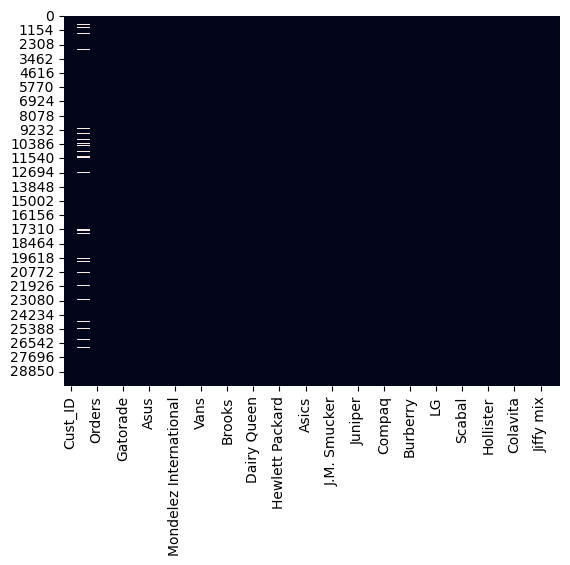

In [180]:
# Checking for nulls 
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [181]:
# Percentage of nulls
df.isnull().sum()/df.shape[0]*100

Cust_ID                   0.00
Gender                    9.08
Orders                    0.00
Jordan                    0.00
Gatorade                  0.00
Samsung                   0.00
Asus                      0.00
Udis                      0.00
Mondelez International    0.00
Wrangler                  0.00
Vans                      0.00
Fila                      0.00
Brooks                    0.00
H&M                       0.00
Dairy Queen               0.00
Fendi                     0.00
Hewlett Packard           0.00
Pladis                    0.00
Asics                     0.00
Siemens                   0.00
J.M. Smucker              0.00
Pop Chips                 0.00
Juniper                   0.00
Huawei                    0.00
Compaq                    0.00
IBM                       0.00
Burberry                  0.00
Mi                        0.00
LG                        0.00
Dior                      0.00
Scabal                    0.00
Tommy Hilfiger            0.00
Holliste

- In dataset we have 9% nulls. 

In [182]:
# Statistical summary of data
df.iloc[:,1:].describe(include='all')

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,27276,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,22054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,NaN,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


- Given data is sparse because almost 75% values are as zeros in every feature.
- Number of females are larger in gender feature.

In [183]:
# Checking for not available values 
df.isna().sum()[df.isna().sum()>0]

Gender    2724
dtype: int64

Here only Gender column contains nulls.

In [184]:
# Create dummies using Gender
df = pd.get_dummies(df, columns=['Gender'])

In [185]:
df.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,10,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


In [186]:
# Now dataframe dont have missing values 
# Two seperate features Gender_F and Gender_M are created using get_dummies
# In those two columns values are 0 where gender is not known 
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [187]:
# Checking for duplicate rows
print(df.duplicated().any())
df[df.duplicated()]

False


,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M


- In dataset we dont have any duplicated rows

In [188]:
# Removing duplicates check
df.drop_duplicates(inplace=True)

In [189]:
# Setting Cust_ID as dataframe index
df.set_index('Cust_ID', inplace=True)

In [190]:
# Changing datatype of Gender_F and Gender_M from 'int' to 'category'
df.Gender_F = df.Gender_F.astype('category')
df.Gender_M = df.Gender_M.astype('category')

In [191]:
# Checking shape of data
df.shape

(30000, 38)

- In above code we have checked dataframe for missing values and duplicate rows.
- Data contained missing values in Gender, this values are filled using fillna method.
- Duplicate rows are dropped.
- Now as we have preprocessed the data we can perform exploratory data analysis.

### Exploratory Data Analysis

Exploratory Data Analysis is very important step in any machine learning project, bacause it helps to understand patterns, ralations and distribution of features which can be crucial for development of robust model.

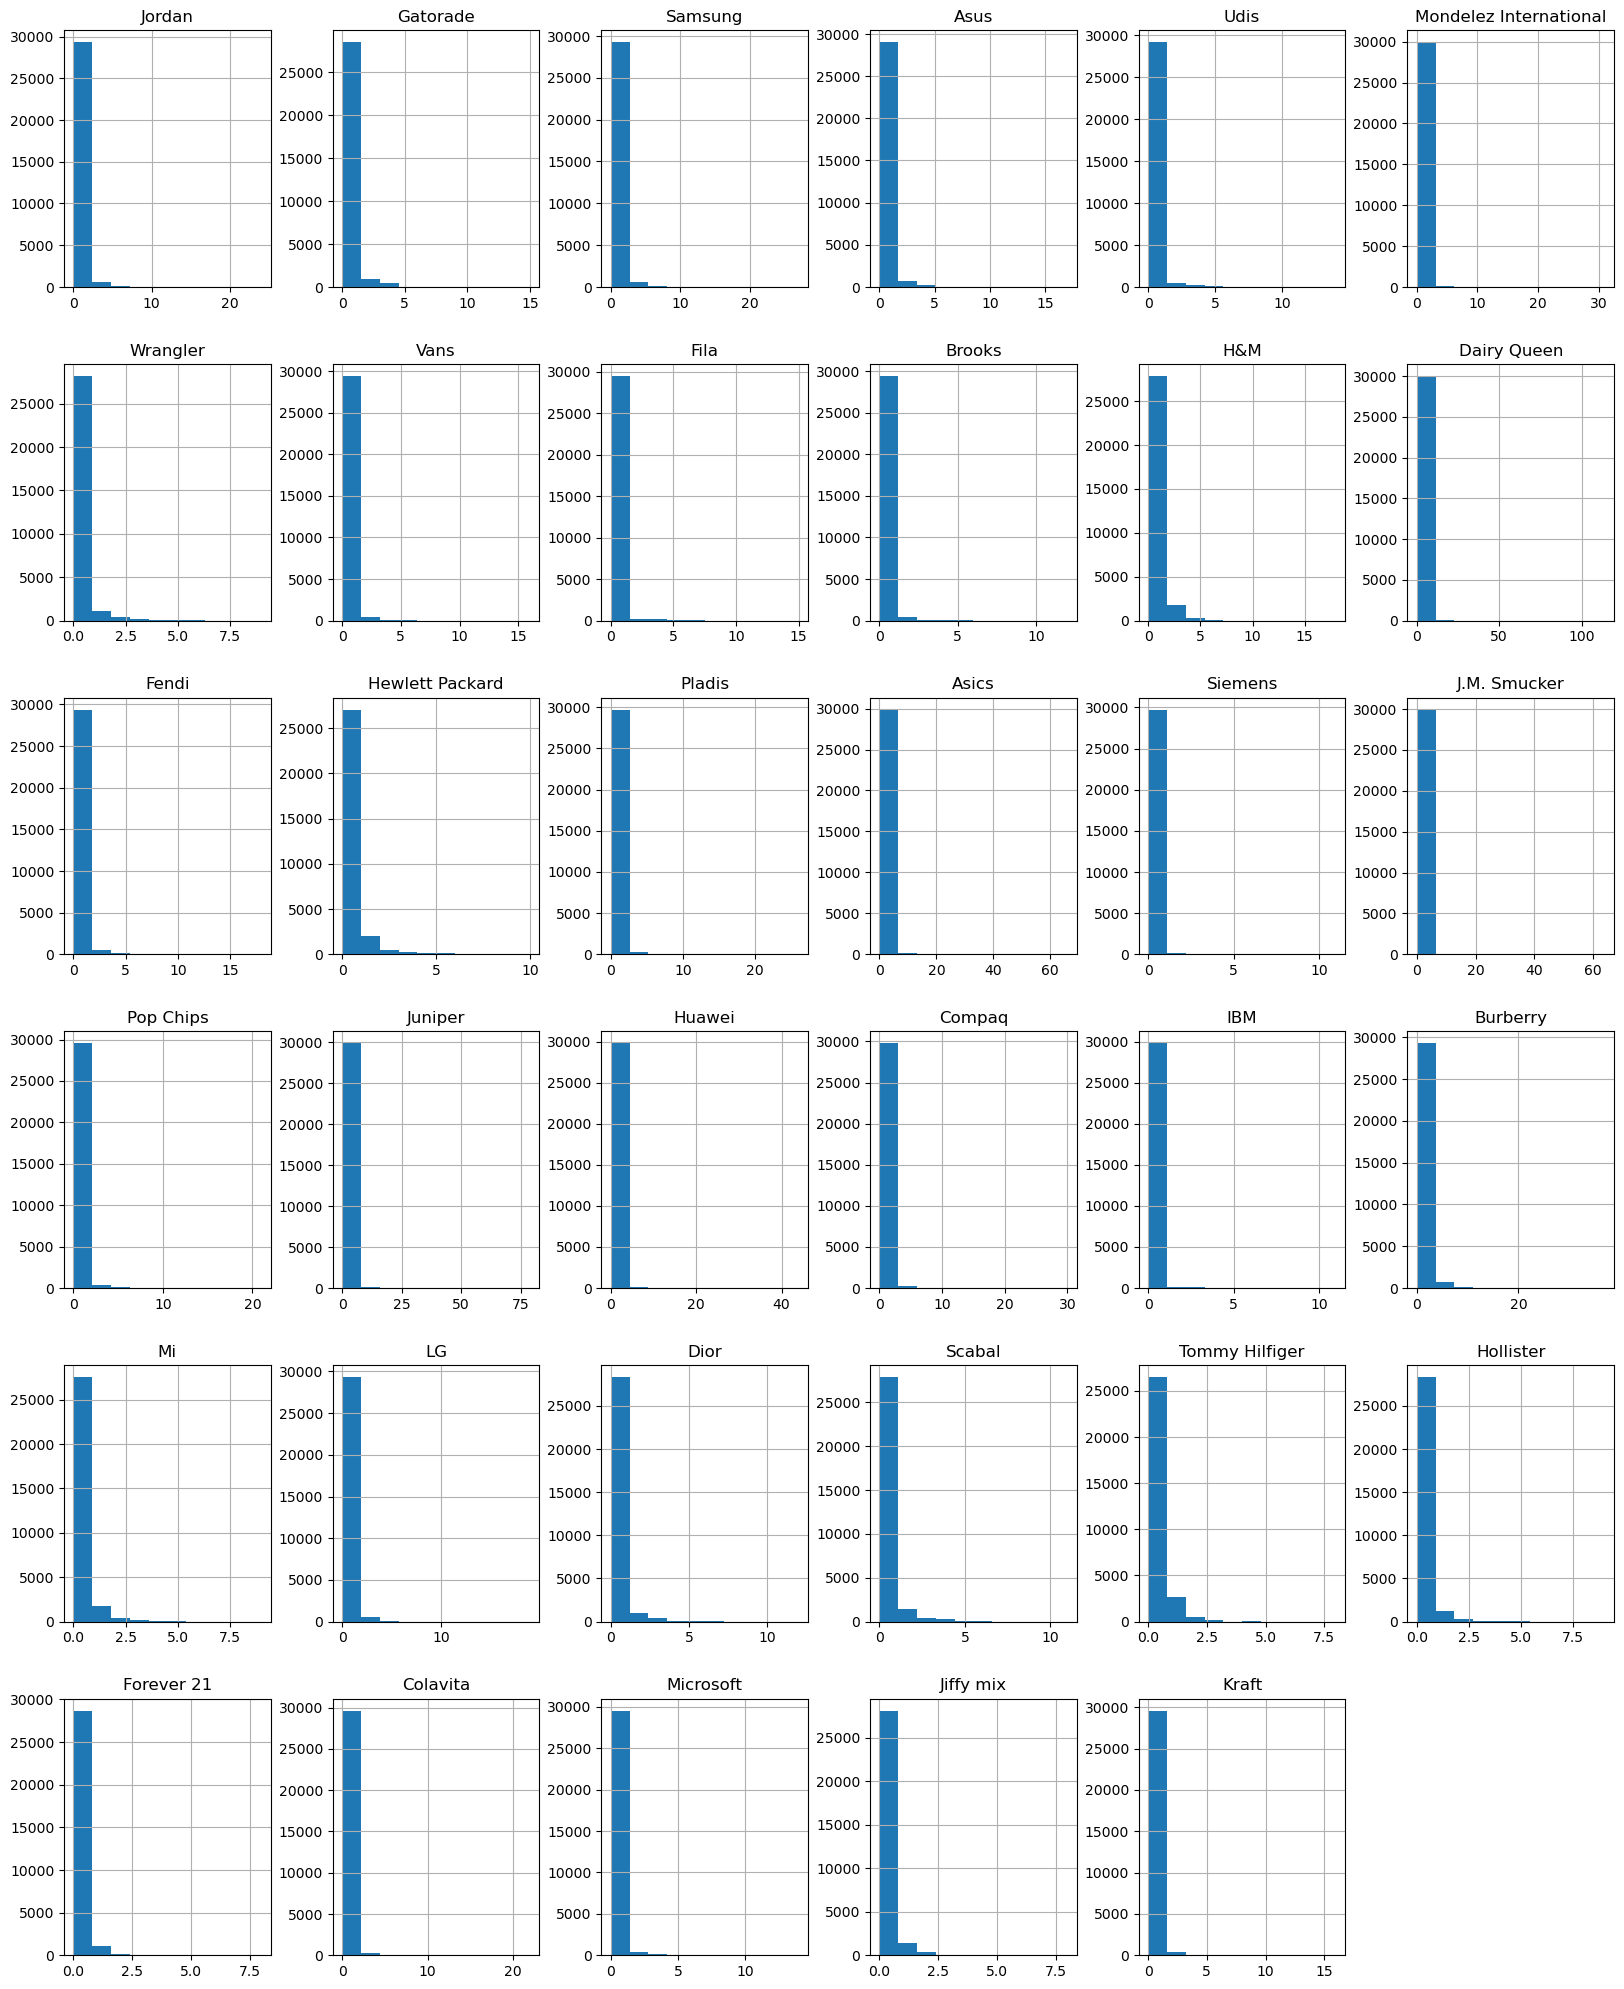

In [192]:
df.iloc[:,1:].hist(figsize=(20,25))
plt.show()

In every feature data is dense between range of 0 to 5.

However maximum values of x axis can vary according to user.

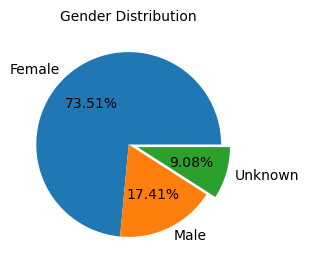

In [193]:
# Pie chart
plt.figure(figsize=(5,3))
plt.pie(data.Gender.value_counts(dropna=False), autopct='%.2f%%', labels=['Female','Male','Unknown'], explode=[0,0,.1])
plt.title('Gender Distribution',fontsize=10)
plt.show()

In data we have 73% females and only 17% males.

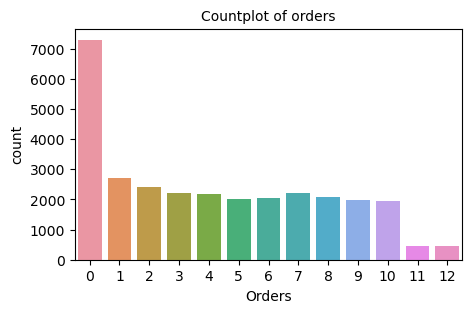

In [194]:
# Countplot of Orders
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Orders')
plt.title('Countplot of orders', fontsize=10)
plt.show()

It looks like many customers haven't placed single order.

In [195]:
# Checking count of orders based on Gender
pd.crosstab(index=data.Gender, columns=data.Orders, values=data.Orders, aggfunc='count', margins=True)

Orders,0,1,2,3,4,5,6,7,8,9,10,11,12,All
Gender,,,,,,,,,,,,,,
F,5090,2047,1796,1671,1626,1497,1498,1699,1516,1489,1464,310,351,22054
M,1204,441,425,385,384,375,388,349,395,353,338,101,84,5222
All,6294,2488,2221,2056,2010,1872,1886,2048,1911,1842,1802,411,435,27276


In above crosstab we can see total number of times customer have searched based on gender.

### Feature Scaling

Feature scaling is used to transform the data into same scale, If variables are not in the same range then larger values will dominate the results.

Here In case of K nearest neighbors model calculates distance between clusters using distance metrics like Euclidean distance, therefore it is important to bring all the features to same scale.

There are mainly two types of scaling Standerdization and Normalization.

Here we want to cluster the customers based on similar interest.

In [196]:
df.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_F',
       'Gender_M'],
      dtype='object')

In [197]:
# Selecting only products
customer = df.drop(['Orders','Gender_M','Gender_F'],axis=1)
customer.columns

Index(['Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

In [198]:
# Transforming data
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
customer = scaled.fit_transform(customer)
customer

array([[-0.33231249, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249,  1.05998399, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249,  1.05998399, -0.24298472, ...,  1.97870833,
        -0.22048554, -0.18277495],
       ...,
       [-0.33231249,  1.05998399, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [ 2.15288625, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495]])

In [199]:
# Creating dataframe of scaled data
customer = pd.DataFrame(customer, columns=df.drop(['Orders','Gender_M','Gender_F'],axis=1).columns)
customer.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


### Building Customer Segmentation Model using K Means Clustering

In [205]:
# Inializing for loop for calculating WCSS and Silhouette Score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = list(range(4,10))     # specifying number of clusters for iteration
WCSS = []
Silhouette_value = []
for i in k:
    kmc = KMeans(n_clusters=i, random_state=71)
    predict = kmc.fit_predict(customer)                                            # training the model for given number of clusters
    WCSS.append(kmc.inertia_)                              # sum of squares values
    Silhouette_value.append(silhouette_score(customer, predict, random_state=65))    # calculating silhouette score

In [206]:
# creating datframe of Silhouette score and WCSS
test = pd.DataFrame({'k':k, 'Silhouette_score':Silhouette_value, 'WCSS':WCSS})
test

,k,Silhouette_score,WCSS
0,4,0.289790,946454.072691
1,5,0.249677,925181.979255
2,6,0.204219,905205.704521
3,7,0.205629,881005.676223
4,8,0.206385,863493.157623
5,9,0.205367,848086.675032


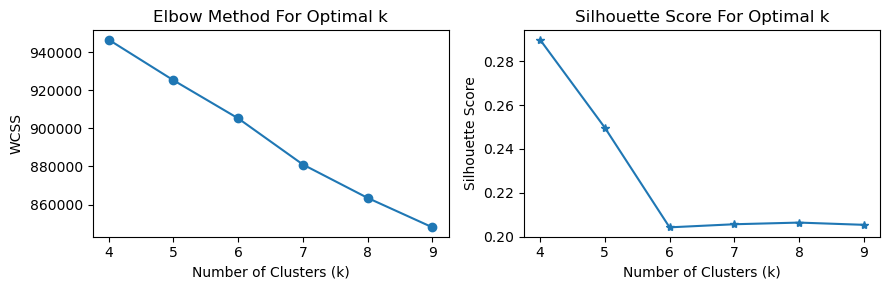

In [207]:
# Plotting the Elbow Curve and Silhouette Score

plt.figure(figsize=(9, 3))

plt.subplot(1,2,1)
plt.plot(k, WCSS, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(k, Silhouette_value, marker='*')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

- In above plot of elbow method we can see their is no fixed pattern.
- But we are getting max silhouette for k=4. 
- So we will take n_clusters=4 for building the final model.

In [208]:
# Building the final model taking k=4
kmc = KMeans(n_clusters=4, random_state=71)
kmc.fit(customer)                                            

KMeans(n_clusters=4, random_state=71)

In [209]:
# Sum of squares within cluster
kmc.inertia_

946454.0726908644

In [210]:
# Calculating silhouette score
silhouette_score(customer, kmc.labels_)

0.28978995454276524

Silhouette score ranges from -1 to +1.

A higher value is desirable and indicates points are placed in correct cluster.

A negative value represents too many or too few clusters are created.

In [211]:
# Saving copy of dataset 
K_means = df.copy(deep=True)

In [212]:
# Generating labels of cluster for each data point 
labels = kmc.labels_

# Adding labels to dataframe for analysis
K_means['labels'] = labels
K_means.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,labels
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,3
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [213]:
# Cluster centers
kmeans_cluster_center = pd.DataFrame(kmc.cluster_centers_, columns=customer.columns)
kmeans_cluster_center.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.447786,0.466624,0.236695,0.159750,0.103752,0.255205,0.319109,0.386965,0.097632,0.807675,...,1.403486,0.634289,0.290313,1.137372,0.337023,0.410487,1.395397,0.810774,1.581924,1.927747
1,-0.115745,0.008844,-0.110634,-0.067437,-0.085711,0.014028,-0.115893,-0.125143,0.008098,-0.127598,...,-0.099200,-0.125519,-0.075429,-0.045547,-0.180234,-0.162498,-0.032390,0.011335,-0.088101,-0.098072
2,0.603317,0.577839,0.340304,0.482685,0.513885,0.315552,0.434144,0.261061,0.144703,0.364685,...,0.059844,0.564855,0.769337,0.349906,0.587828,0.541141,0.002093,0.095380,-0.020943,-0.088701
3,-0.159436,-0.158447,-0.087668,-0.117436,-0.120960,-0.086830,-0.113558,-0.077289,-0.038804,-0.124075,...,-0.087707,-0.160547,-0.190119,-0.141295,-0.147825,-0.141690,-0.076064,-0.066724,-0.079306,-0.082433


Cluster centers can give information about the variables belonging to cluster.
Now, we will extract the variables in each of the clusters and try to name each of the cluster based on the variables.

In [214]:
# Number of clusters and its count
np.unique(K_means.labels, return_counts=True)

(array([0, 1, 2, 3]), array([ 1253,   700,  5243, 22804], dtype=int64))

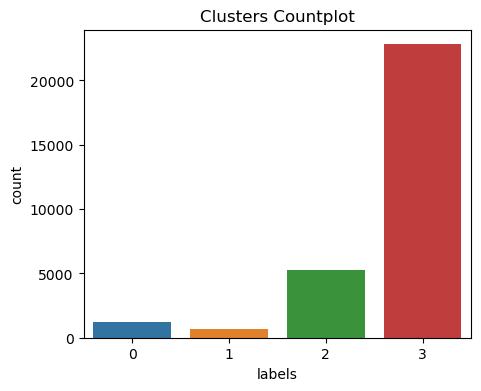

In [215]:
# Countplot of clusters
plt.figure(figsize=(5,4))
sns.countplot(x=K_means.labels)
plt.title('Clusters Countplot')
plt.show()

last cluster is biggets followed by second last cluster.

### Analysis of clusters

### Cluster 0

In [216]:
# Seperating cluster 0
kmeans_cluster_0 = K_means[K_means.labels==0]

Sorting all the variables based on value for the cluster center (i.e., the variable with the highest value of the cluster center will be on top of the sorted list) and storing the first ten variables as a list

In [217]:
# sorting the variables based on cluster centers
cluster_0 = sorted(zip(list(kmeans_cluster_center.iloc[0,:]), list(kmeans_cluster_center.columns)), reverse = True)[:10]  
cluster_0 = pd.DataFrame(cluster_0)
cluster_0[1]

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

The above list includes food brands like Pladis, Dairy Queen, Kraft, Colavita etc. therefore we will name this cluster as Basket.

In [228]:
# Statistical summary
kmeans_cluster_0[['Orders', 'Gender_F', 'Gender_M', 'labels']].describe(include='all')

,Orders,Gender_F,Gender_M,labels
count,1253.000000,1253,1253,1253.0
unique,NaN,2,2,NaN
top,NaN,1,0,NaN
freq,NaN,1030,1103,NaN
mean,4.152434,NaN,NaN,0.0
std,3.631365,NaN,NaN,0.0
min,0.000000,NaN,NaN,0.0
25%,1.000000,NaN,NaN,0.0
50%,4.000000,NaN,NaN,0.0
75%,7.000000,NaN,NaN,0.0


In this cluster males are in less number while gender=unknown customers are higher.

### Cluster 1

In [229]:
# Seperating cluster 1
kmeans_cluster_1 = K_means[K_means.labels==1]

In [230]:
# sorting the variables based on cluster centers
cluster_1 = sorted(zip(list(kmeans_cluster_center.iloc[1,:]), list(kmeans_cluster_center.columns)), reverse = True)[:10] 
cluster_1 = pd.DataFrame(cluster_1)
cluster_1[1]

0                   Siemens
1                     Asics
2              J.M. Smucker
3                 Pop Chips
4                   Juniper
5                    Huawei
6                        Mi
7                    Compaq
8    Mondelez International
9                 Microsoft
Name: 1, dtype: object

These brands cover a range of industries including technology so we will name this group as technology.

In [238]:
kmeans_cluster_1[['Orders', 'Gender_F', 'Gender_M', 'labels']].describe(include='all')

,Orders,Gender_F,Gender_M,labels
count,700.000000,700,700,700.0
unique,NaN,2,2,NaN
top,NaN,1,0,NaN
freq,NaN,496,553,NaN
mean,4.394286,NaN,NaN,1.0
std,3.518839,NaN,NaN,0.0
min,0.000000,NaN,NaN,1.0
25%,1.000000,NaN,NaN,1.0
50%,4.000000,NaN,NaN,1.0
75%,7.000000,NaN,NaN,1.0


In this cluster also number of females are higher.

### Cluster 2

In [239]:
# Seperating cluster 1
kmeans_cluster_2 = K_means[K_means.labels==2]

In [240]:
# sorting the variables based on cluster centers
cluster_2 = sorted(zip(list(kmeans_cluster_center.iloc[2,:]), list(kmeans_cluster_center.columns)), reverse = True)[:10] 
cluster_2 = pd.DataFrame(cluster_2)
cluster_2[1]

0        Scabal
1        Jordan
2     Hollister
3      Gatorade
4          Dior
5    Forever 21
6           H&M
7          Udis
8        Huawei
9          Asus
Name: 1, dtype: object

This cluster have different brands from fashion like Scabal, Jordan, Hollister, Dior etc. So we will namr this group as fashion.

In [241]:
kmeans_cluster_2[['Orders', 'Gender_F', 'Gender_M', 'labels']].describe(include='all')

,Orders,Gender_F,Gender_M,labels
count,5243.000000,5243,5243,5243.0
unique,NaN,2,2,NaN
top,NaN,1,0,NaN
freq,NaN,4429,4773,NaN
mean,4.465192,NaN,NaN,2.0
std,3.509088,NaN,NaN,0.0
min,0.000000,NaN,NaN,2.0
25%,1.000000,NaN,NaN,2.0
50%,4.000000,NaN,NaN,2.0
75%,7.000000,NaN,NaN,2.0


This is the second beggest cluster.

### Cluster 3

In [242]:
# Seperating cluster 1
kmeans_cluster_3 = K_means[K_means.labels==3]

In [243]:
# sorting the variables based on cluster centers
cluster_3 = sorted(zip(list(kmeans_cluster_center.iloc[3,:]), list(kmeans_cluster_center.columns)), reverse = True)[:10] 
cluster_3 = pd.DataFrame(cluster_3)
cluster_3[1]

0                IBM
1               Fila
2    Hewlett Packard
3             Compaq
4          Microsoft
5              Fendi
6           Colavita
7               Vans
8          Jiffy mix
9              Kraft
Name: 1, dtype: object

This group covers electronic brands like IBM, HP, Compaq and Microsoft so we will name this group as Electronics.

In [244]:
# Statistical summary
kmeans_cluster_3[['Orders', 'Gender_F', 'Gender_M', 'labels']].describe(include='all')

,Orders,Gender_F,Gender_M,labels
count,22804.000000,22804,22804,22804.0
unique,NaN,2,2,NaN
top,NaN,1,0,NaN
freq,NaN,16099,18349,NaN
mean,4.095948,NaN,NaN,3.0
std,3.605108,NaN,NaN,0.0
min,0.000000,NaN,NaN,3.0
25%,0.000000,NaN,NaN,3.0
50%,4.000000,NaN,NaN,3.0
75%,7.000000,NaN,NaN,3.0


this is the biggest cluster.

### Summary

In this project we have used data from E commerce website to seggregate customers based on their interest using K means clustering algorithm.

Based on best Silhouette score the four different clusters are created.

Further using cluster centers analysis we found important variables belonging to each cluster.

Four different clusters are as follow:
- Basket 
- Technology 
- Fashion
- Electronics